<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Homework_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from matplotlib import pyplot as plt

In [4]:
uploaded = files.upload()

Saving athletes.csv to athletes.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['athletes.csv']))
df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [6]:
df.gold.unique()

array([0, 1, 2, 3, 4, 5])

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(df.loc[:, ['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])
#'sex',
le = LabelEncoder()
le.fit(df['sex'])
y = pd.Series(data=le.transform(df['sex']))
y
#y = y.apply(lambda yy: 0 if yy == 0 else 1)


0        1
1        0
2        1
3        1
4        1
        ..
10853    0
10854    0
10855    1
10856    1
10857    1
Length: 10858, dtype: int64

Будем строить модель на определение пола

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probas = model.predict_proba(X_test)

print(accuracy_score(y_test, predictions))
predictions

0.8232044198895028


array([1, 1, 0, ..., 1, 0, 1])

In [30]:
1

1

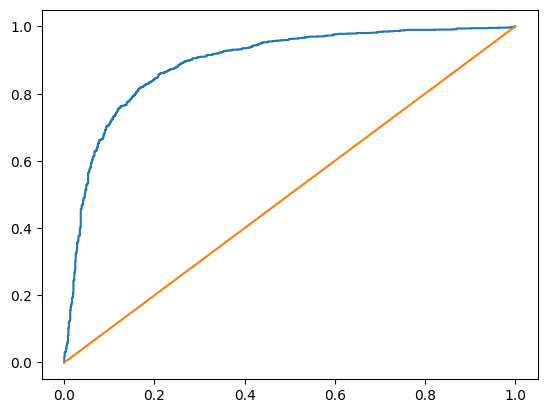

In [32]:


fpr, tpr, thres = roc_curve(y_test.values, probas[:, 1])
plt.plot( fpr, tpr )
plt.plot( [0, 1] )
plt.show()

In [36]:
roc_auc_score(y_test.values, probas[:, 1])

0.892634423503326

In [94]:
def get_roc(y_test, y_probas):
  TPR = []
  FPR = []
  PPV = []
  TH = []
  for threshold in range(1000, 0, -1):
    threshold /= 1000
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip(y_probas, y_test):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    TPR.append(tp/(tp + fn))
    FPR.append(fp/(fp + tn))
    if tp + fp != 0:
      PPV.append(tp/(tp + fp))
    else:
      PPV.append(None)
    TH.append(threshold)
  return FPR, TPR, PPV

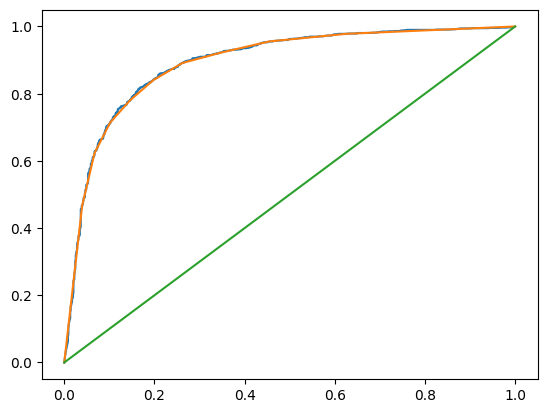

In [96]:
fpr2, tpr2, ppv2 = get_roc(y_test.values, probas[:, 1])
plt.plot( fpr2, tpr2 )
plt.plot( fpr, tpr )
plt.plot( [0, 1] )
plt.show()

Вывод: готовая и написанная вручную функции рассчета roc показывают одинаковый график

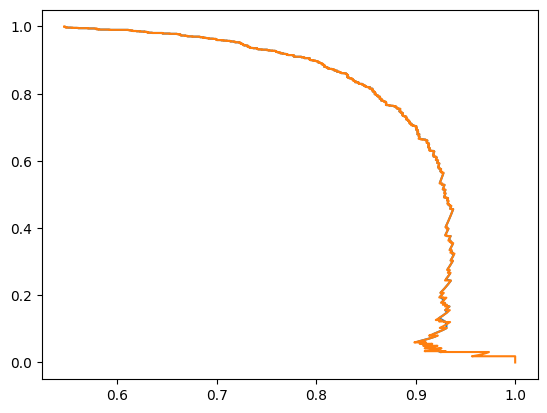

In [97]:
pr, re, thres = precision_recall_curve(y_test.values, probas[:, 1])
# по википедии TPR - это recall
# а PPV - это precision
plt.plot( ppv2, tpr2 )
plt.plot( pr, re )
plt.show()

In [98]:
auc = np.trapz(tpr2, fpr2, dx=0.01)
auc


0.8865056390462894

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

Чем больше площадь под графиком, тем лучше считается результат обучения.
Исходя из полученного графика roc и метрики auc полученная модель довольно точна.

b. *может ли ROC-кривая проходить ниже диагонали?

Теоретически может, если после обучения модель дает результат "хуже случайного". Но так как в таком случае модель можно "перевернуть", инвертируя предсказания модели, рассматривать roc ниже диагонали смысла не имеет.